# Required libraries

In [350]:
import pandas as pd
import matplotlib.pyplot as plt  
import math
from math import pi
import numpy as np
import seaborn as sns
import warnings  
warnings.filterwarnings('ignore')
np.seterr(divide='ignore', invalid='ignore')
%matplotlib inline 

## Overview of the data set

In [351]:
#Load the data set 
loan_df = pd.read_csv('loan.csv')

loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [352]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


# Data Cleaning

## Steps followed in the data cleaning
1. Find out how many empty rows and columns are there in the data set.
2. Find out which columns have all null values and remove them.
3. Drop the additional columns which are not considered for the analysis.

In [353]:
print('Number of empty Rows:')
print(loan_df.isnull().all(axis=1).sum())

print('Number of empty Columns:')
print(loan_df.isnull().all(axis=0).sum())

Number of empty Rows:
0
Number of empty Columns:
54


In [354]:
#Columns having null values.
loan_df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [355]:
#Remove the columns having null values.
loan_df.drop(loan_df.iloc[:, 53:105], inplace = True, axis = 1) 

In [356]:
#Check the data set size now.
loan_df.shape 

(39717, 59)

Here we observe that number of columns have been reduced from 111 to 59.

In [357]:
#Removal of additional columns which will not be considered for analysis.

columns_drop_list = ["member_id","url","emp_title","home_ownership","zip_code","addr_state","delinq_2yrs"]
loan_df.drop(labels = columns_drop_list, axis =1, inplace=True)

columns_drop_list1 = ["earliest_cr_line", "inq_last_6mths", "mths_since_last_delinq",
       "mths_since_last_record", "open_acc", "pub_rec"]
loan_df.drop(labels = columns_drop_list1, axis =1, inplace=True)

columns_drop_list2 = ["revol_bal","total_acc","initial_list_status","out_prncp","out_prncp_inv"]
loan_df.drop(labels = columns_drop_list2, axis =1, inplace=True)

columns_drop_list3 = ["total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries"]
loan_df.drop(labels = columns_drop_list3, axis =1, inplace=True)

columns_drop_list4 = ["collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","next_pymnt_d","last_credit_pull_d"]
loan_df.drop(labels = columns_drop_list4, axis =1, inplace=True)

columns_drop_list5 = ["collections_12_mths_ex_med","mths_since_last_major_derog","policy_code","application_type","pub_rec_bankruptcies"]
loan_df.drop(labels = columns_drop_list5, axis =1, inplace=True)

In [358]:
#Check the data size now.
loan_df.shape

(39717, 26)

Here we observe that number of columns have got reduced further from 59 to 26.

In [359]:
#The following columns will be used for further analysis.
loan_df.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'desc',
       'purpose', 'title', 'dti', 'revol_util', 'total_pymnt', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object')

## Conversion of data into uniform representation

- Removal of symbols from the selected columns.

In [360]:
loan_df['int_rate'] = loan_df['int_rate'].str.rstrip('%')
loan_df['emp_length'] = loan_df['emp_length'].str.rstrip('+ years')
loan_df['emp_length'] = loan_df['emp_length'].str.rstrip('< 1')
loan_df['revol_util'] = loan_df['revol_util'].str.rstrip('%')

In [361]:
# convertion of amount columns into uniform numeric data.

col1 = ['loan_amnt','funded_amnt','int_rate','funded_amnt_inv','installment','dti','total_pymnt']
loan_df[col1] = loan_df[col1].apply(pd.to_numeric)

# Handling Missing Values
- Drop the columns having more than 90% of missing values.

In [362]:
na_trash = len(loan_df)*90/100
loan_df = loan_df.dropna(thresh=na_trash, axis=1)

In [363]:
#Check the data size now.
loan_df.shape

(39717, 21)

In [364]:
loan_df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,dti,revol_util,total_pymnt,tax_liens
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,...,Verified,Dec-11,Fully Paid,n,credit_card,Computer,27.65,83.70,5863.155187,0.0
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,C4,,...,Source Verified,Dec-11,Charged Off,n,car,bike,1.00,9.40,1008.710000,0.0
2,1077175,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10,...,Not Verified,Dec-11,Fully Paid,n,small_business,real estate business,8.72,98.50,3005.666844,0.0
3,1076863,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10,...,Source Verified,Dec-11,Fully Paid,n,other,personel,20.00,21,12231.890000,0.0
4,1075358,3000,3000,3000.0,60 months,12.69,67.79,B,B5,,...,Source Verified,Dec-11,Current,n,other,Personal,17.94,53.90,3513.330000,0.0


In [365]:
#Names of the columns left for further analysis.
loan_df.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'purpose', 'title', 'dti', 'revol_util', 'total_pymnt', 'tax_liens'],
      dtype='object')

In [366]:
# Finding percentage of null or missing values

null_perc = round(100*(loan_df.isnull().sum()/len(loan_df.index)), 2)

# Printing columns which have more than 0% missing values

null_perc[ null_perc > 0 ]

emp_length    2.71
title         0.03
revol_util    0.13
tax_liens     0.10
dtype: float64

In [367]:
loan_df.drop(null_perc[ null_perc > 30 ].index, axis=1, inplace=True)

# Derived Metrics
## Creation of new additional columns

In [368]:
#Year and Month columns are created using issue_d column.

loan_df.issue_d = pd.to_datetime(loan_df.issue_d, format='%b-%y')
loan_df['year']=loan_df['issue_d'].dt.year
loan_df['month']=loan_df['issue_d'].dt.month

loan_df.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,...,loan_status,pymnt_plan,purpose,title,dti,revol_util,total_pymnt,tax_liens,year,month
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10,...,Fully Paid,n,credit_card,Computer,27.65,83.70,5863.155187,0.0,2011,12
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,C4,,...,Charged Off,n,car,bike,1.00,9.40,1008.710000,0.0,2011,12
2,1077175,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10,...,Fully Paid,n,small_business,real estate business,8.72,98.50,3005.666844,0.0,2011,12
3,1076863,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10,...,Fully Paid,n,other,personel,20.00,21,12231.890000,0.0,2011,12
4,1075358,3000,3000,3000.0,60 months,12.69,67.79,B,B5,,...,Current,n,other,Personal,17.94,53.90,3513.330000,0.0,2011,12


## Categorical division of the following columns.
- Loan Amount
- Annual Income
- Interest Rate
- Debt to Interest Ratio

In [369]:
# categorise loan amounts into different groups which will help in further analysis.
loan_df['loan_amnt_cats'] = pd.cut(loan_df['loan_amnt'], [0, 7000, 14000, 21000, 28000, 35000], labels=['0-7000', '7000-14000', '14000-21000', '21000-28000', '28000 +'])

# categorise annual income into different groups.
loan_df['annual_inc_cats'] = pd.cut(loan_df['annual_inc'], [0, 20000, 40000, 60000, 80000,1000000], labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000 +'])

# categorise intrest rates into different groups.
loan_df['int_rate_cats'] = pd.cut(loan_df['int_rate'], [0, 10, 12.5, 16, 20], labels=['0-10', '10-13', '12.5-16', '16 +'])

# categorise dti into different groups.
loan_df['dti_cats'] = pd.cut(loan_df['dti'], [0, 5, 10, 15, 20, 25], labels=['0-5', '05-10', '10-15', '15-20', '25+'])

# Univariate Analysis

Following variables are considered for the Univariate analysis.
- Loan Status
- Loan Amount
- Funded Amount
- Investors' Funded Amount
- Annual Income
- Term of loan
- Employment Length

## Univariate Analysis - Loan Status

In [370]:
# Lets take a look at one of the important variables - Loan status.

(loan_df.loan_status.value_counts()*100)/len(loan_df)

Fully Paid     82.961956
Charged Off    14.167737
Current         2.870307
Name: loan_status, dtype: float64

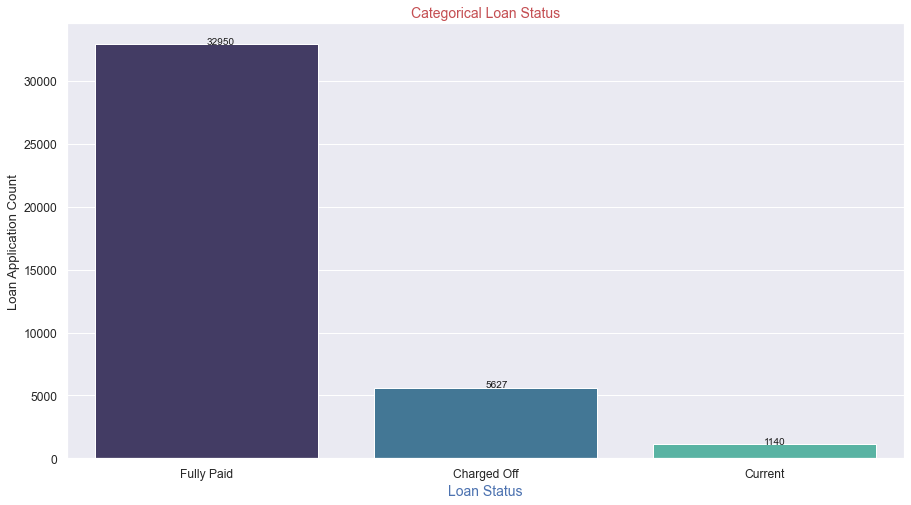

In [371]:
# Univariate Analysis - Unordered Categorical Variables - Loan Status

plt.figure(figsize=(15,8))

ax = sns.countplot(x="loan_status",data=loan_df,palette='mako')
ax.set_title('Categorical Loan Status',fontsize=14, color = 'r')
ax.set_xlabel('Loan Status',fontsize=14, color='b')
ax.set_ylabel('Loan Application Count')     

# To show count of values above bars
s=loan_df['loan_status'].value_counts()
for i, v in s.reset_index().iterrows():
    ax.text(i, v.loan_status + 0.3 , v.loan_status, color='k')

### Observations
- Above plot shows that around 14.16% (5627 / 39717) loans were charged off out of total loan issued.

## Univariate Analysis - Loan Amount

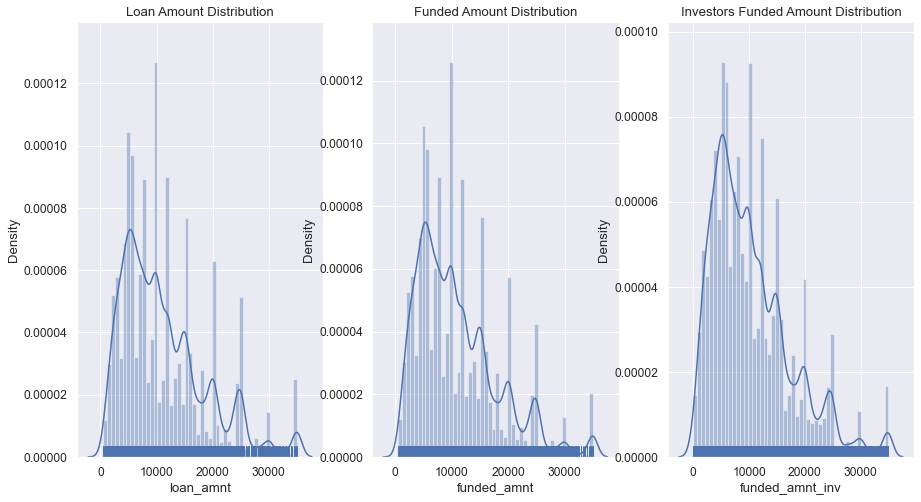

In [372]:
plt.figure(figsize=(15,8))
plt.subplot(1,3,1)
sns.distplot(a=loan_df.loan_amnt, rug=True)
plt.title('Loan Amount Distribution')

plt.subplot(1,3,2)
sns.distplot(a=loan_df.funded_amnt, rug=True)
plt.title('Funded Amount Distribution')

plt.subplot(1,3,3)
sns.distplot(a=loan_df.funded_amnt_inv, rug=True)
plt.title('Investors Funded Amount Distribution')
plt.show()

### Observation
- All 3 variables have similar distribution. We can consider any one variable for analysis. So let us consider Loan Amount for further analysis.

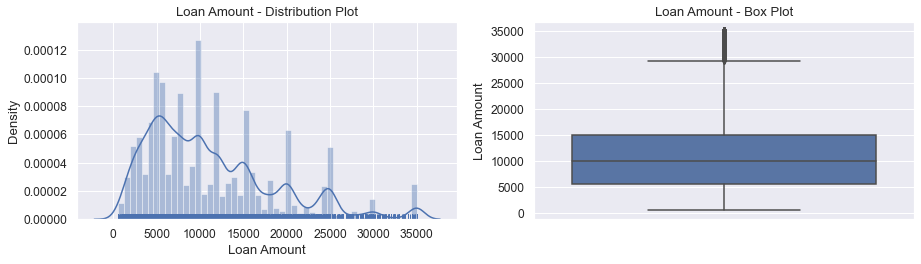

In [373]:
# Univariate Analysis on Loan amount-Quantitative Variables

plt.figure(figsize=(15,8))

plt.subplot(2, 2, 1)
ax = sns.distplot(loan_df['loan_amnt'],rug = True)
ax.set_title('Loan Amount - Distribution Plot')
ax.set_xlabel('Loan Amount')

plt.subplot(2, 2, 2)
ax = sns.boxplot(y=loan_df['loan_amnt'])
ax.set_title('Loan Amount - Box Plot')
ax.set_ylabel('Loan Amount')
plt.show()

### Observation
- Loan amount is in the range 5000 to 15000.

## Univariate Analysis - Annual Income

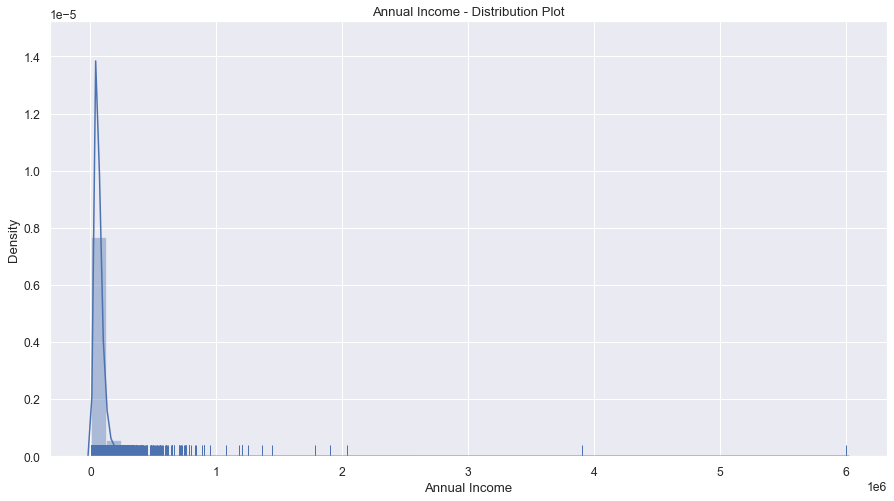

In [374]:
# Univariate Analysis on Annual Income - Quantitative Variables

plt.figure(figsize=(15,8))

ax = sns.distplot(loan_df['annual_inc'],rug = True)
ax.set_title('Annual Income - Distribution Plot')
ax.set_xlabel('Annual Income')
plt.show()

## Univariate Analysis - Employment Length

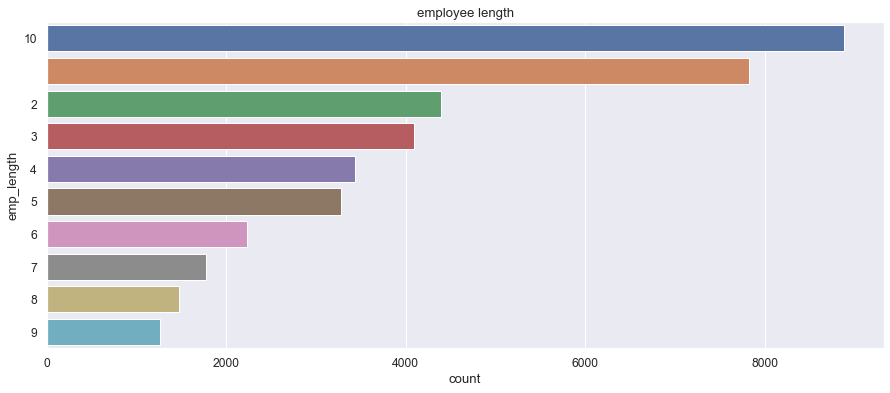

In [375]:
plt.figure(figsize=(15,6))
ax = sns.countplot(y=loan_df['emp_length'],order = loan_df['emp_length'].value_counts().index)
ax = plt.title('employee length')

## Univariate Analysis - Loan Term

In [376]:
loan_df['term'] = loan_df.term.str.strip()
loan_df.term.unique()

array(['36 months', '60 months'], dtype=object)

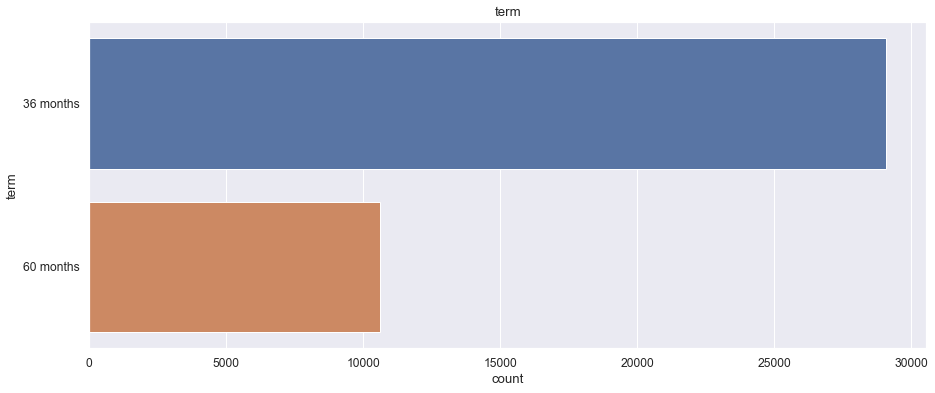

In [377]:
plt.figure(figsize=(15,6))
ax = sns.countplot(y=loan_df['term'],order = loan_df['term'].value_counts().index)
ax = plt.title('term')

## Time Series Plot

In [378]:
# Create a new status dictionary
new_status_dict = {
    'Fully Paid': 'Fully Paid',
    'Charged Off': 'Charged Off',
    'Current': 'Current'
}

loan_df['new_status'] = loan_df['loan_status'].map(new_status_dict)
pd.Series(pd.unique(loan_df['new_status'])).to_frame()

,0
0,Fully Paid
1,Charged Off
2,Current


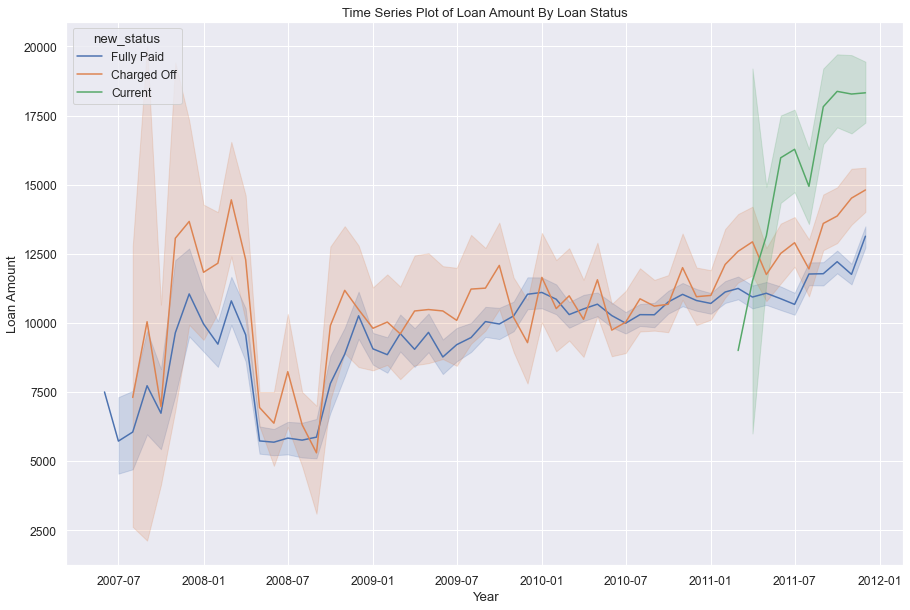

In [379]:
plt.figure(figsize=(15,10))

ax = sns.lineplot(x="issue_d", y="loan_amnt",hue="new_status", data=loan_df)
ax = plt.title('Time Series Plot of Loan Amount By Loan Status')
ax = plt.xlabel('Year')
ax = plt.ylabel('Loan Amount')

# Bivariate Analysis
Following are the variables considered for bivariate analysis.
- Purpose of loan
- Loan amount
- Interest rate
- Annual income
- Grades
- Verification Status

##  Loan amount vs. Purpose of loan

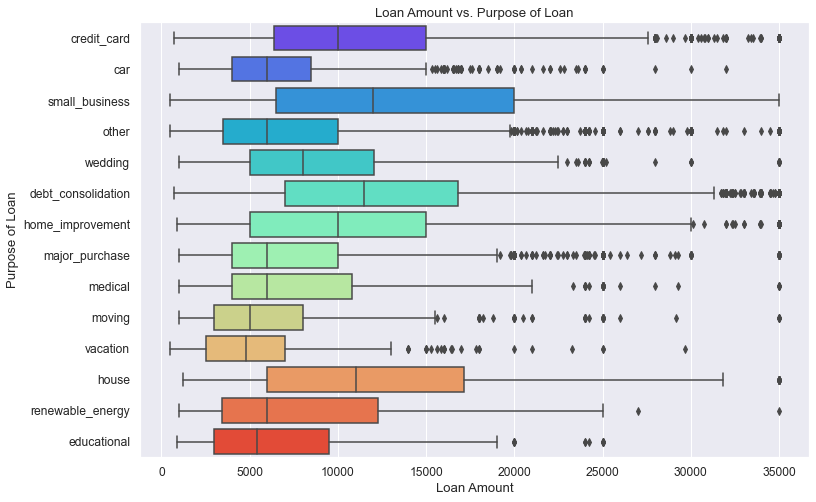

In [380]:
plt.figure(figsize=(12,8))
ax = sns.boxplot(y='purpose', x='loan_amnt', data =loan_df,palette='rainbow')
ax.set_title('Loan Amount vs. Purpose of Loan')
ax.set_ylabel('Purpose of Loan')
ax.set_xlabel('Loan Amount')
plt.show()

### Observations
- Median,95th percentile,75th percentile of loan amount are highest for loan taken for small business purpose among all other purposes.
- House loan & Debt consolidation are second and Credit card & Home improvement loans are at 3rd positions.

## Years vs. Interest Rate

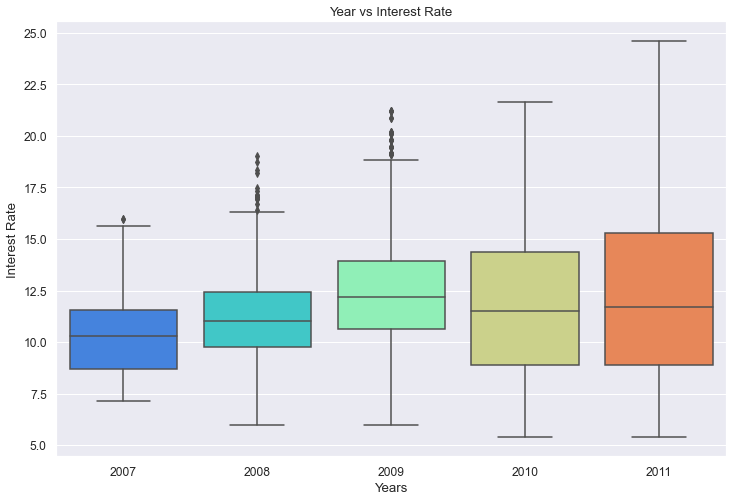

In [381]:
plt.figure(figsize=(12,8))
ax = sns.boxplot(y='int_rate', x='year', data =loan_df,palette='rainbow')
ax.set_title('Year vs Interest Rate')
ax.set_ylabel('Interest Rate')
ax.set_xlabel('Years')
plt.show()

### Observations
- Plot shows intrest rate is increasing with increase in year.

## Term of loan vs. Interest Rate

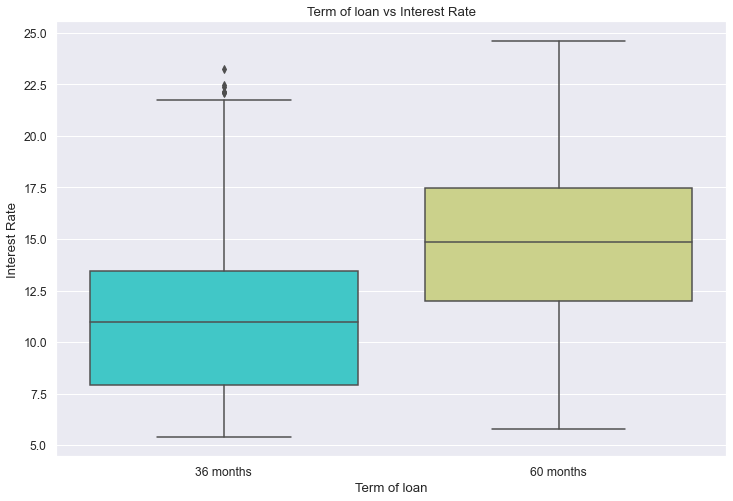

In [382]:
plt.figure(figsize=(12,8))
ax = sns.boxplot(y='int_rate', x='term', data =loan_df,palette='rainbow')
ax.set_title('Term of loan vs Interest Rate')
ax.set_ylabel('Interest Rate')
ax.set_xlabel('Term of loan')
plt.show()

### Observations
- It is clear that avearge interest rate is higher for 60 months loan term.
- Most of the loans issued for longer term had higher intrest rates.

## Loan amount vs. Interest rate

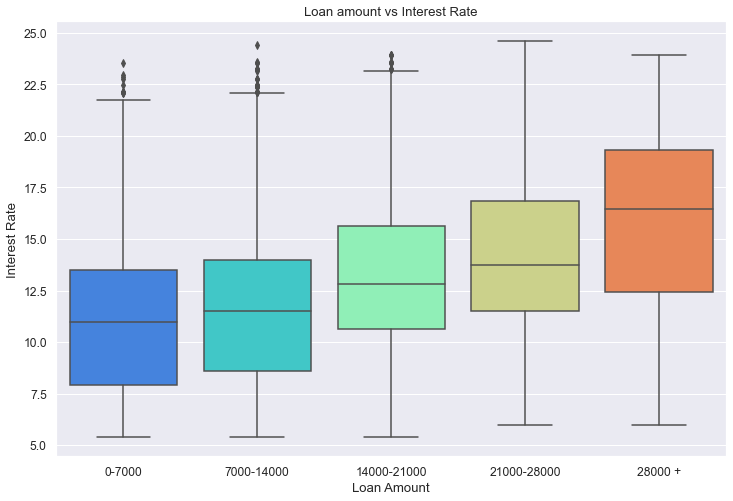

In [383]:
plt.figure(figsize=(12,8))
ax = sns.boxplot(y='int_rate', x='loan_amnt_cats', data =loan_df,palette='rainbow')
ax.set_title('Loan amount vs Interest Rate')
ax.set_ylabel('Interest Rate')
ax.set_xlabel('Loan Amount')
plt.show()

### Observations
- It is clear that intrest rates are increasing with increase in loan amount.

## Interest rate vs. Charged off proportion

In [384]:
# Bivariate Analysis on interest rate against Chargedoff_Proportion

interest_vs_loan = loan_df.groupby(['int_rate_cats', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
interest_vs_loan['Total'] = interest_vs_loan['Charged Off'] + interest_vs_loan['Current'] + interest_vs_loan['Fully Paid'] 
interest_vs_loan['Chargedoff_Proportion'] = interest_vs_loan['Charged Off'] / interest_vs_loan['Total']
interest_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,int_rate_cats,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
3,16 +,1266,359,3372,4997,0.253352
2,12.5-16,2003,332,9470,11805,0.169674
1,10-13,1232,270,8148,9650,0.127668
0,0-10,830,77,11486,12393,0.066973


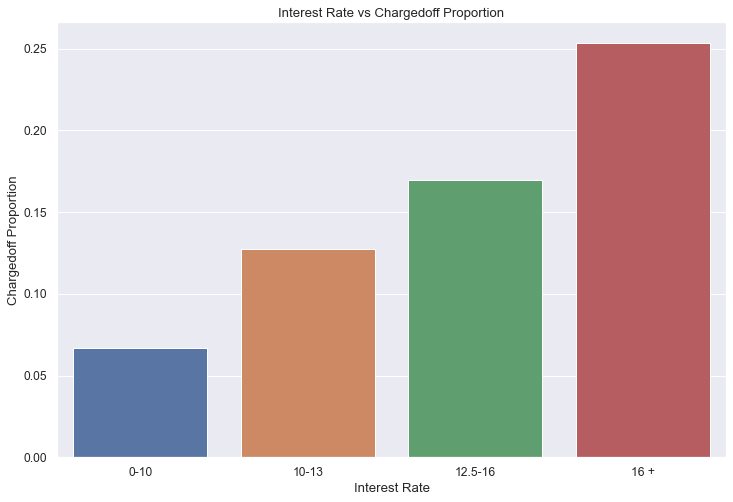

In [385]:
ax1 = plt.subplots(figsize=(12, 8))

ax1=sns.barplot(x='int_rate_cats', y='Chargedoff_Proportion', data=interest_vs_loan)
ax1.set_title('Interest Rate vs Chargedoff Proportion')
ax1.set_xlabel('Interest Rate')
ax1.set_ylabel('Chargedoff Proportion')
plt.show()

### Observations
- Intrest rates are starting from minimin 5 %.
- Interest rates less than 10% has very less chances of charged off. 
- Interest rates more than 16% has good chnaces of charged off as compared to other categories of interest rates.
- Charged off proportion is increasing with higher intrest rates.

## Annual income vs. Charged off proportion

In [386]:
# Bivariate Analysis on annual income against Chargedoff_Proportion -

inc_range_vs_loan = loan_df.groupby(['annual_inc_cats', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
inc_range_vs_loan['Total'] = inc_range_vs_loan['Charged Off'] + inc_range_vs_loan['Current'] + inc_range_vs_loan['Fully Paid'] 
inc_range_vs_loan['Chargedoff_Proportion'] = inc_range_vs_loan['Charged Off'] / inc_range_vs_loan['Total']
inc_range_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)



loan_status,annual_inc_cats,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
0,0-20000,237,9,943,1189,0.199327
1,20000-40000,1514,170,7004,8688,0.174263
2,40000-60000,1729,345,9534,11608,0.148949
3,60000-80000,1024,240,6597,7861,0.130263
4,80000 +,1122,376,8859,10357,0.108333


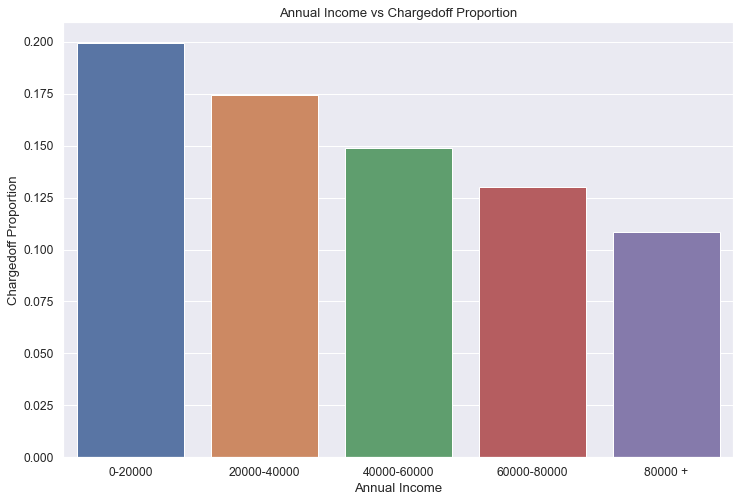

In [387]:
#Bar plots to understand the relationship betweeen annual income & charged off proportion.
ax1 = plt.subplots(figsize=(12, 8))
ax1=sns.barplot(x='annual_inc_cats', y='Chargedoff_Proportion', data=inc_range_vs_loan)
ax1.set_title('Annual Income vs Chargedoff Proportion')
ax1.set_ylabel('Chargedoff Proportion')
ax1.set_xlabel('Annual Income')
plt.show()

### Observations
- Income range 80000+  has less chances of charged off.
- Income range 0-20000 has high chances of charged off.
- Notice that with increase in annual income, the charged off proportion got decreased. 

## Grades vs. Charged off proportion

In [388]:
# Bivariate Analysis on grade against Chargedoff_Proportion

grade_vs_loan = loan_df.groupby(['grade', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
grade_vs_loan['Total'] = grade_vs_loan['Charged Off'] + grade_vs_loan['Current'] + grade_vs_loan['Fully Paid'] 
grade_vs_loan['Chargedoff_Proportion'] = grade_vs_loan['Charged Off'] / grade_vs_loan['Total']
grade_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,grade,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
6,G,101,17,198,316,0.319620
5,F,319,73,657,1049,0.304099
4,E,715,179,1948,2842,0.251583
3,D,1118,222,3967,5307,0.210665
2,C,1347,264,6487,8098,0.166337
1,B,1425,345,10250,12020,0.118552
0,A,602,40,9443,10085,0.059693


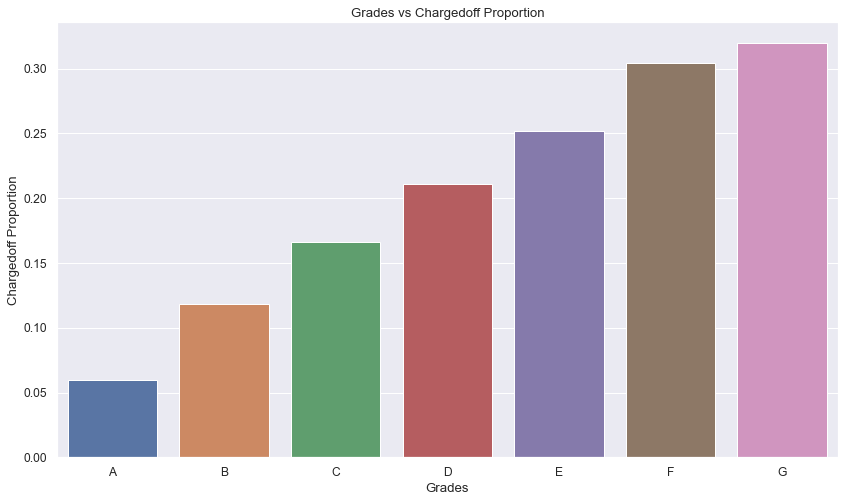

In [389]:
#Bar plots for the analysis of grades vs. charged off proportion.

ax1 = plt.subplots(figsize=(14, 8))
ax1=sns.barplot(x='grade', y='Chargedoff_Proportion', data=grade_vs_loan)
ax1.set_title('Grades vs Chargedoff Proportion')
ax1.set_xlabel('Grades')
ax1.set_ylabel('Chargedoff Proportion')
plt.show()

### Observations
- Grade "A" has very less chances of charged off.
- Grade "F" and "G" have very high chances of charged off.
- Chances of charged off is increasing with grades moving from "A" towards "G"

In [390]:
# Bivariate Analysis on verification_status against Chargedoff_Proportion

verify_vs_loan = loan_df.groupby(['verification_status', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
verify_vs_loan['Total'] = verify_vs_loan['Charged Off'] + verify_vs_loan['Current'] + verify_vs_loan['Fully Paid'] 
verify_vs_loan['Chargedoff_Proportion'] = verify_vs_loan['Charged Off'] / verify_vs_loan['Total']
verify_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,verification_status,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
2,Verified,2051,603,10155,12809,0.160122
1,Source Verified,1434,310,8243,9987,0.143587
0,Not Verified,2142,227,14552,16921,0.126588


## Verification Status vs. Charged off proportion

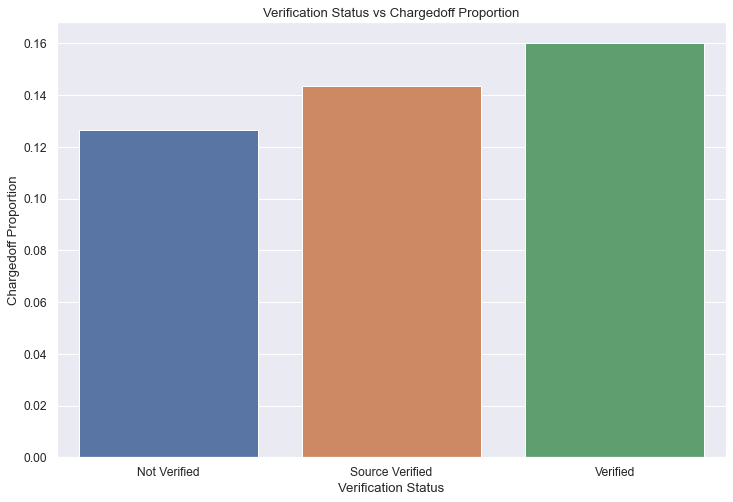

In [391]:
# Lets draw bar plots on data calculated above. Try to visualize the pattern to understand the data better.

ax1 = plt.subplots(figsize=(12, 8))

ax1=sns.barplot(x='verification_status', y='Chargedoff_Proportion', data=verify_vs_loan)
ax1.set_title('Verification Status vs Chargedoff Proportion')
ax1.set_xlabel('Verification Status')
ax1.set_ylabel('Chargedoff Proportion')
plt.show()

### Observations
- There is not much difference in charged off proportion.
- This variable doesn't provide any insights for charged off.

## Purpose of loan vs. Charged off proportion

In [392]:
# Bivariate Analysis on purpose of Loan against Chargedoff_Proportion.

purpose_vs_loan = loan_df.groupby(['purpose', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
purpose_vs_loan['Total'] = purpose_vs_loan['Charged Off'] + purpose_vs_loan['Current'] + purpose_vs_loan['Fully Paid'] 
purpose_vs_loan['Chargedoff_Proportion'] = purpose_vs_loan['Charged Off'] / purpose_vs_loan['Total']
purpose_vs_loan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,purpose,Charged Off,Current,Fully Paid,Total,Chargedoff_Proportion
11,small_business,475.0,74.0,1279.0,1828.0,0.259847
10,renewable_energy,19.0,1.0,83.0,103.0,0.184466
3,educational,56.0,0.0,269.0,325.0,0.172308
9,other,633.0,128.0,3232.0,3993.0,0.158527
8,moving,92.0,7.0,484.0,583.0,0.157804
5,house,59.0,14.0,308.0,381.0,0.154856
7,medical,106.0,12.0,575.0,693.0,0.152958
2,debt_consolidation,2767.0,586.0,15288.0,18641.0,0.148436
12,vacation,53.0,6.0,322.0,381.0,0.139108
4,home_improvement,347.0,101.0,2528.0,2976.0,0.116599


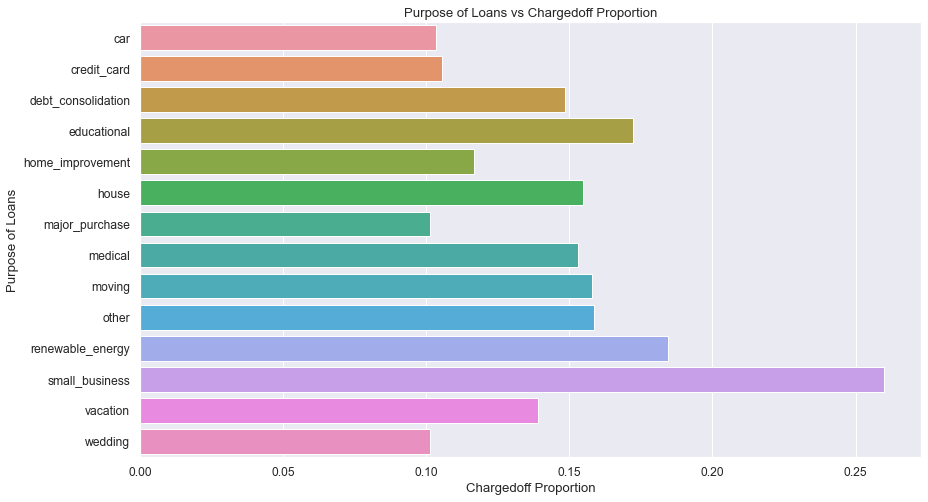

In [393]:
 # Bar plot
ax1 = plt.subplots(figsize=(14, 8))

ax1=sns.barplot(y='purpose', x='Chargedoff_Proportion', data=purpose_vs_loan)
ax1.set_title('Purpose of Loans vs Chargedoff Proportion')
ax1.set_ylabel('Purpose of Loans')
ax1.set_xlabel('Chargedoff Proportion')
plt.show()

### Observations
- Small Business applicants have high chnaces of getting charged off.